In [352]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [353]:
df= sns.load_dataset("mpg")

In [224]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [225]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [226]:
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


# 1.understanding business case and domain analysis
### we need to understand the fuel efficiency of car models. so my approach here is to find the relation of mpg with cylinders	,displacement	,horsepower,	weight,	acceleration	,model_year	


# 2.basic checks

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [228]:
## here all the variables are numerical except origin and name.
## total there are 398 entries. In column horsepower i see some null values. 

In [229]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [230]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [231]:
## average fuel efficiency of vehicles is 23.51mpg. the fuel efficiency of vehicles is from 9mpg to 46mpg.
## cylinder size of most of the vehicles is 4 . and also there are some vehicles which has lowest cylinder size 3 
## and some has highest cylinder size 8.
##In displacement there is  a standard deviation of 104.27. the lowest is 68 and highest is 455. so there are chances for outliers in displacement.
##average horsepower of vehicles is 104.47. and it has 6 values missing in the dataset. some vehicle has min horsepower 46 
## and some have max of 230. there are vehicles with min weight 1613 and max weight 5140. But most of the vehicles are o weight 2803.5.
## Acceleration time ranges from 8 to 24 which shows the various performance level.Most of the vehicles are made in 1976.
## This dataset has  the list of vehicles from 1970 to 1982.  most of the vehicles in this list is made in USA. and model Ford pinto came more frequent(6 times) in the dataset.

# 3. EDA

In [232]:
##univariate analysis

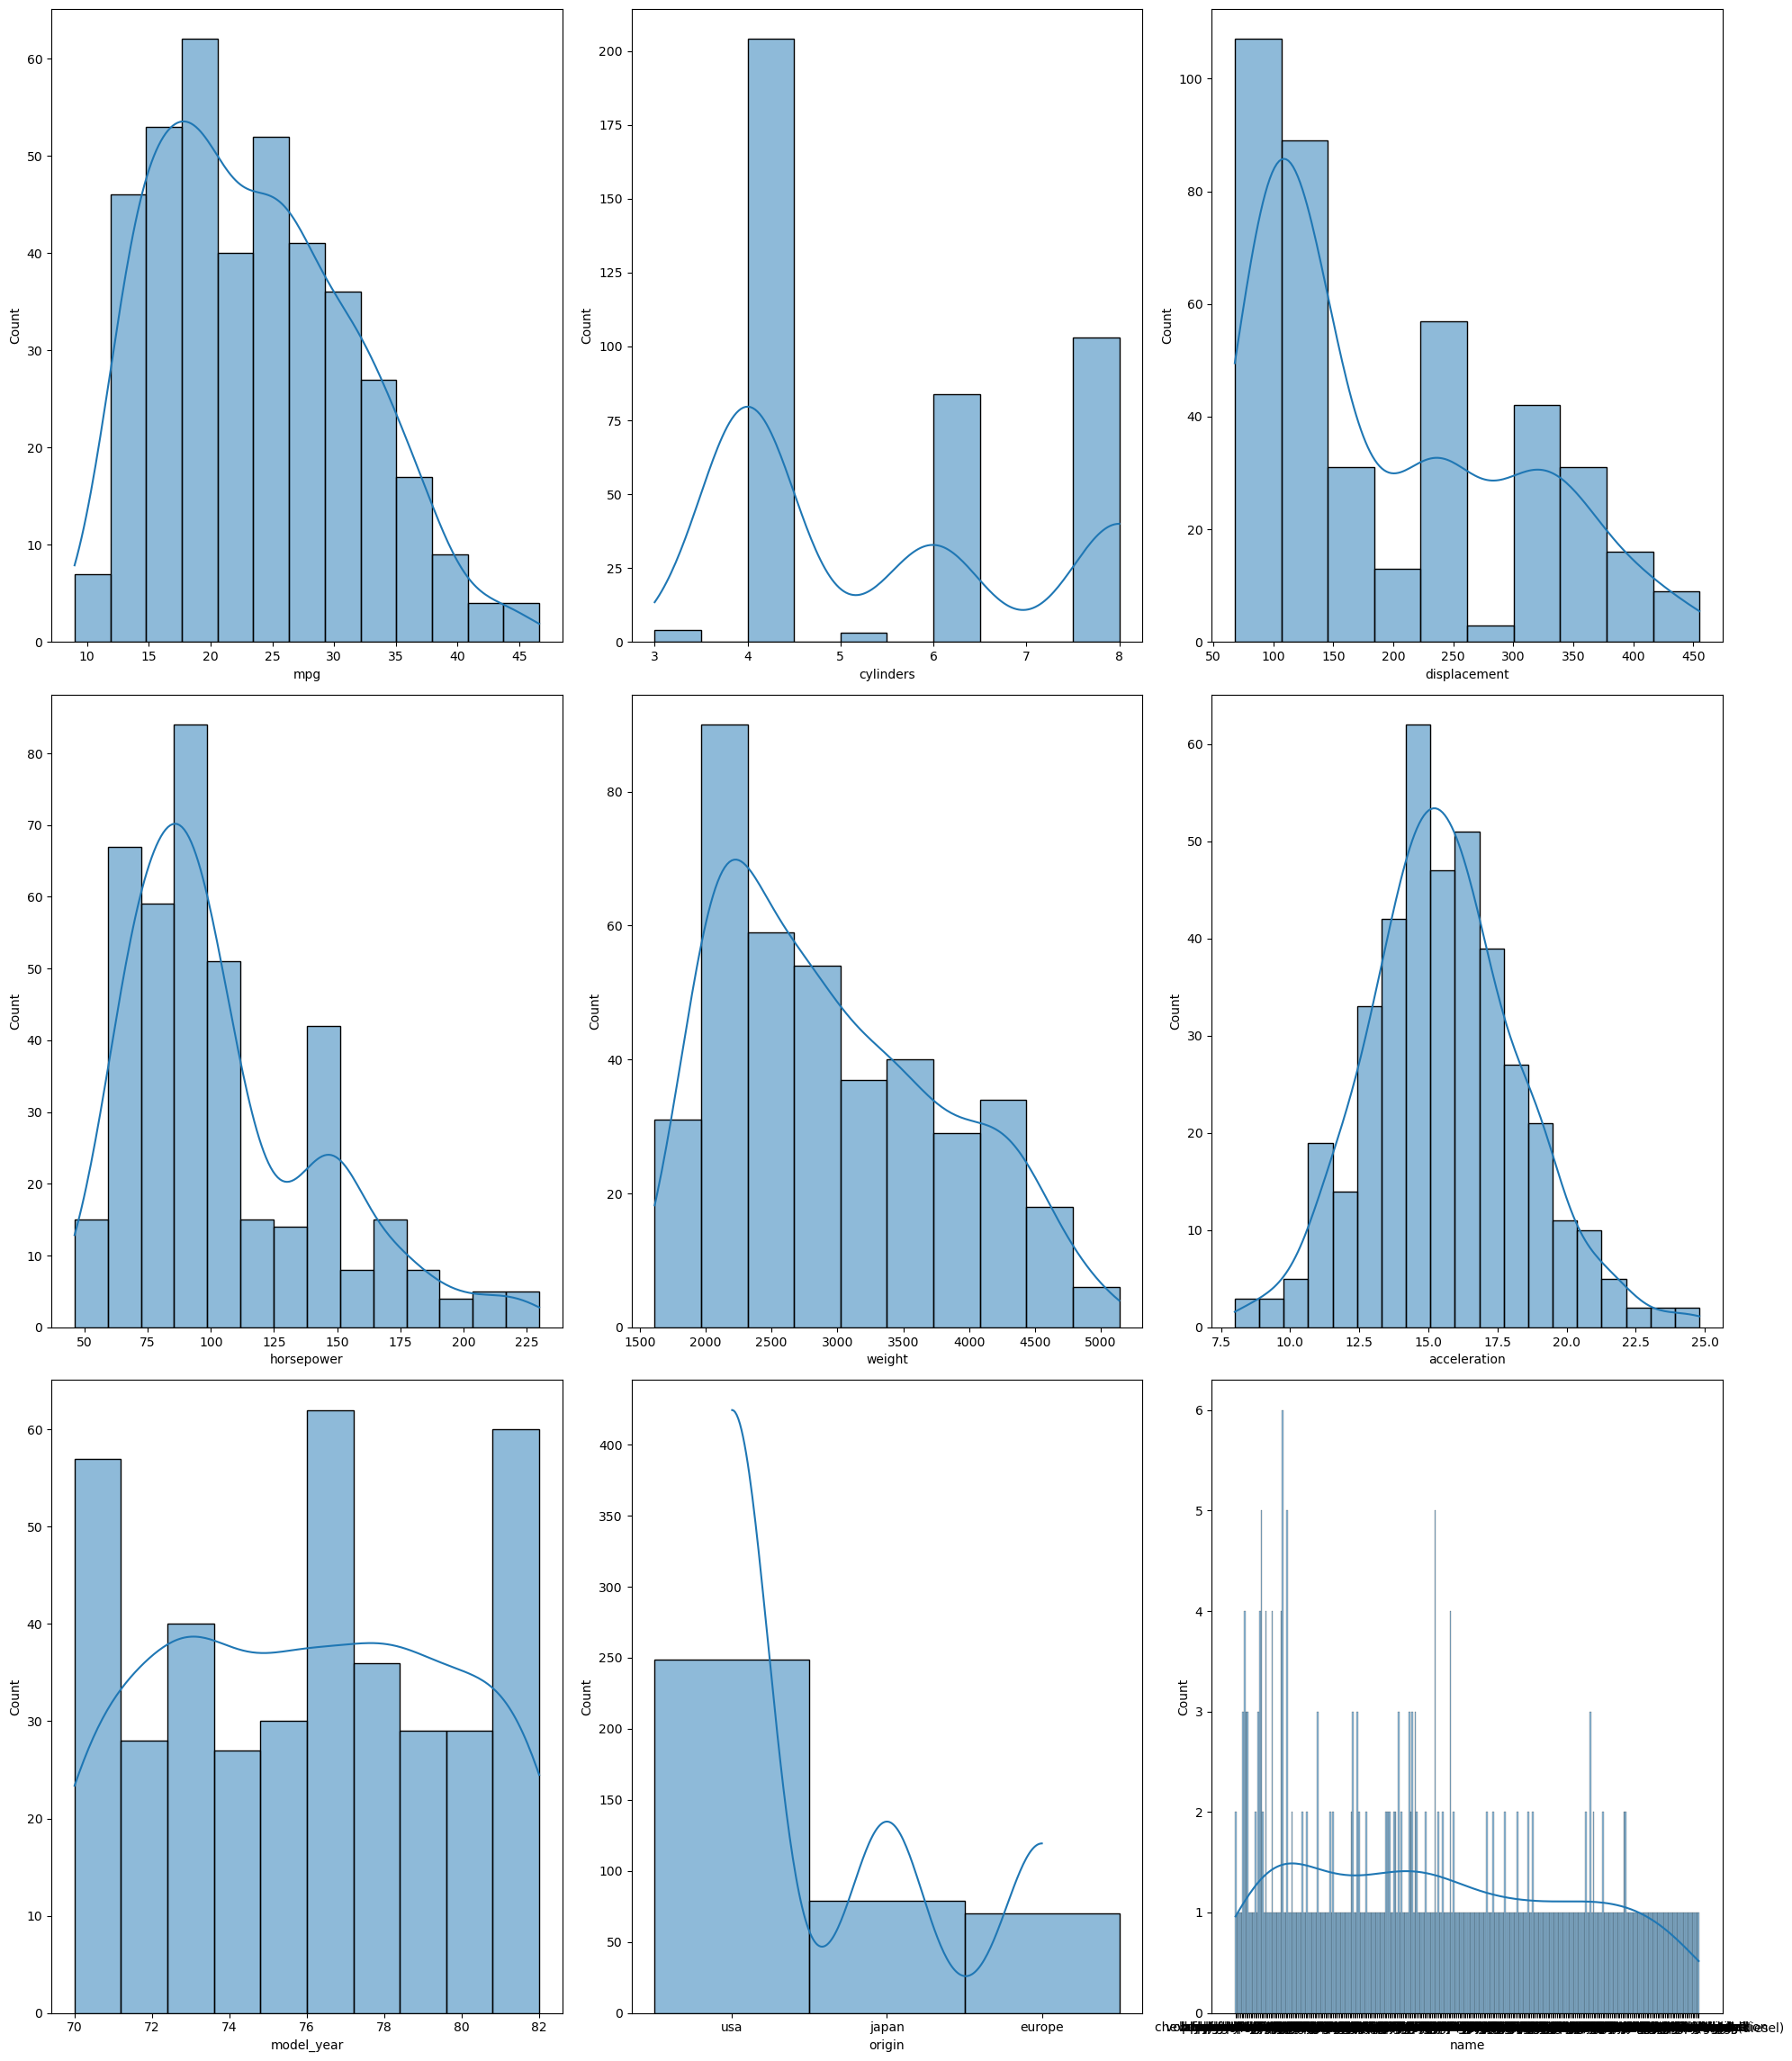

In [278]:
plt.figure(figsize=(20,23),facecolor='white')
pltno =1
for i in df.columns:
    plt.subplot(3,3,pltno)
    sns.histplot(x=df[i], kde=True)
    pltno=pltno+1
    plt.tight_layout()

In [234]:
## here only acceleration seems to follow normal distribution. all others are skewed.

<Axes: xlabel='model_year', ylabel='mpg'>

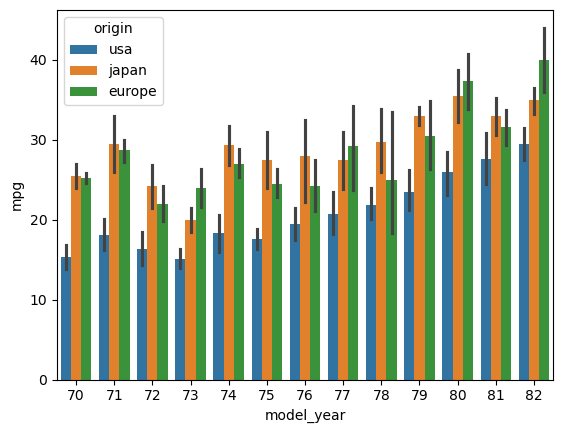

In [295]:

sns.barplot(y='mpg',x='model_year', hue='origin',data=df)

In [ ]:
# the vehicles made in japan and europe are more efficient than the one made in USA.And also we can see 
## an increase in the fuel efficiency from 1979 onwards

<Axes: xlabel='cylinders', ylabel='mpg'>

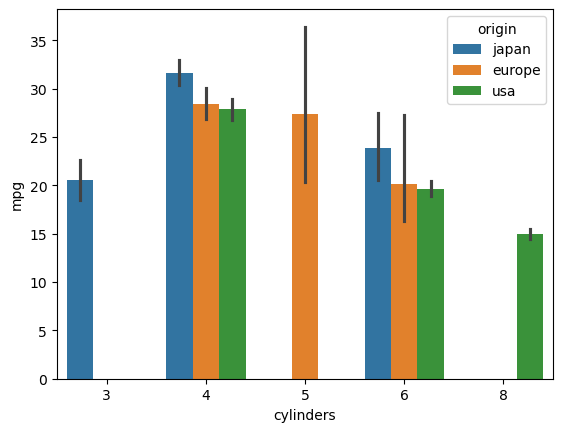

In [301]:
sns.barplot(y='mpg',x='cylinders', hue='origin',data=df)

In [302]:
## more number of cylinders doesnot mean that it has more mpg. Seems like vehicles with 4 cylinders
## made in japan has more effiency in using fuel.Second comes those with the same number of cylinders made in europe and USA.
##Those vehicles made in USA  with 8 cylinders has least  fuel efficiency.

([<matplotlib.patches.Wedge at 0x2012d79eff0>,
 [Text(-0.04340268967550522, 1.0991433967089699, '4'),
  Text(-0.6906767581881664, -0.8561341108136535, '8'),
  Text(0.7869722585138125, -0.7685536183830438, '6'),
  Text(1.0965749247684011, -0.08673773324900445, '3'),
  Text(1.0996915986507076, -0.026045879847893992, '5')])

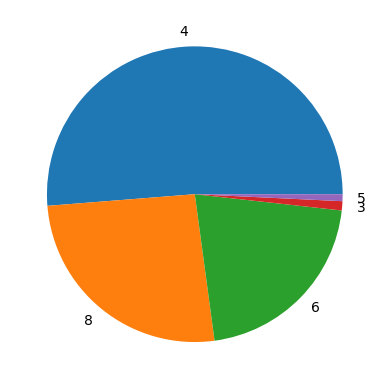

In [304]:
x=df.cylinders.value_counts()
plt.pie(x.values, labels=x.index)

In [ ]:
## most of the vehicles has 4 cylinders

In [235]:
## multivariate analysis

<Axes: xlabel='model_year', ylabel='cylinders'>

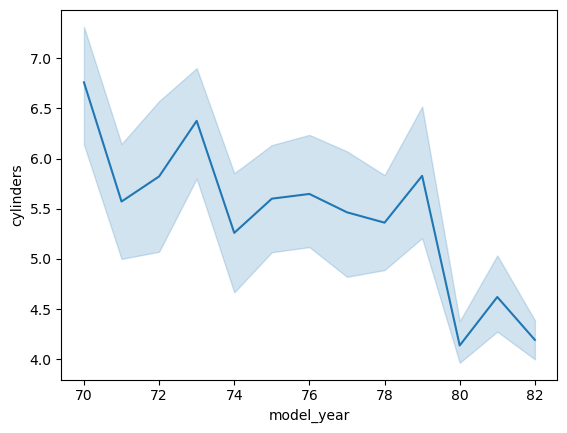

In [338]:
sns.lineplot(y='cylinders',x='model_year', data=df)

In [310]:
## seems like the vehicles have less number of cylinders after 1979. From the above lineplot we can see 
## a decrease in the number of cylinders in vehicles over the years

<Axes: xlabel='model_year', ylabel='acceleration'>

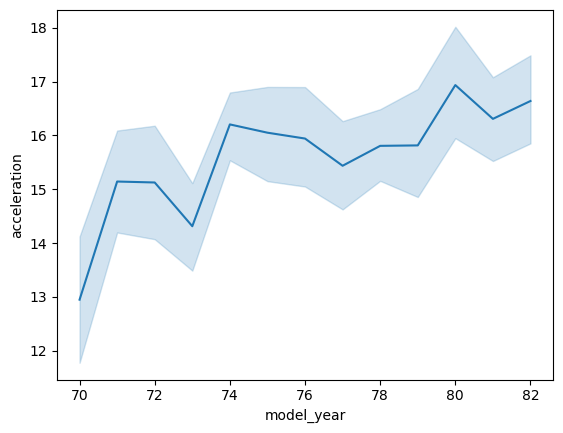

In [312]:
sns.lineplot(y='acceleration',x='model_year', data=df)

In [ ]:
## there is an increase in  vehicle acceleration over the years

<Axes: xlabel='acceleration', ylabel='mpg'>

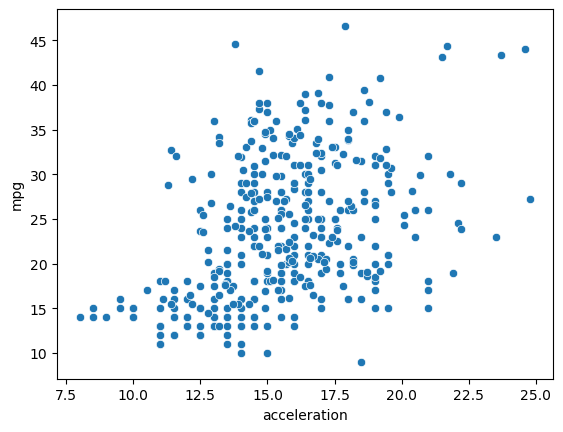

In [320]:
sns.scatterplot(x='acceleration',y='mpg', data=df)

In [ ]:
## most of the vehicles with high mpg has accelaration between 12.5 and 20.0

In [350]:
sorted = df.sort_values(by='mpg',ascending=False)
sorted.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel
309,41.5,4,98.0,76.0,2144,14.7,80,europe,vw rabbit
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun 210
247,39.4,4,85.0,70.0,2070,18.6,78,japan,datsun b210 gx


In [337]:
## the above are the list of good fuel effiecient vehicles from 1970 to 1982.they are not that heavy and all of them are made in the year 1978-1980 in europe or japan.
## mazda glc has the best mpg 46.6 which is made in japan , model_year 1980

In [345]:
 df.sort_values(by='mpg').head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


In [ ]:
## most of the less fuel efficient vehicles are made in USA and has the high no. of cylinders 8 and are heavy.

In [351]:
df.loc[df['origin']=='usa'].sort_values(by='mpg', ascending=False).head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
344,39.0,4,86.0,64.0,1875,16.4,81,usa,plymouth champ
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
378,38.0,4,105.0,63.0,2125,14.7,82,usa,plymouth horizon miser
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
379,36.0,4,98.0,70.0,2125,17.3,82,usa,mercury lynx l
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom
350,34.7,4,105.0,63.0,2215,14.9,81,usa,plymouth horizon 4
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3
351,34.4,4,98.0,65.0,2045,16.2,81,usa,ford escort 4w


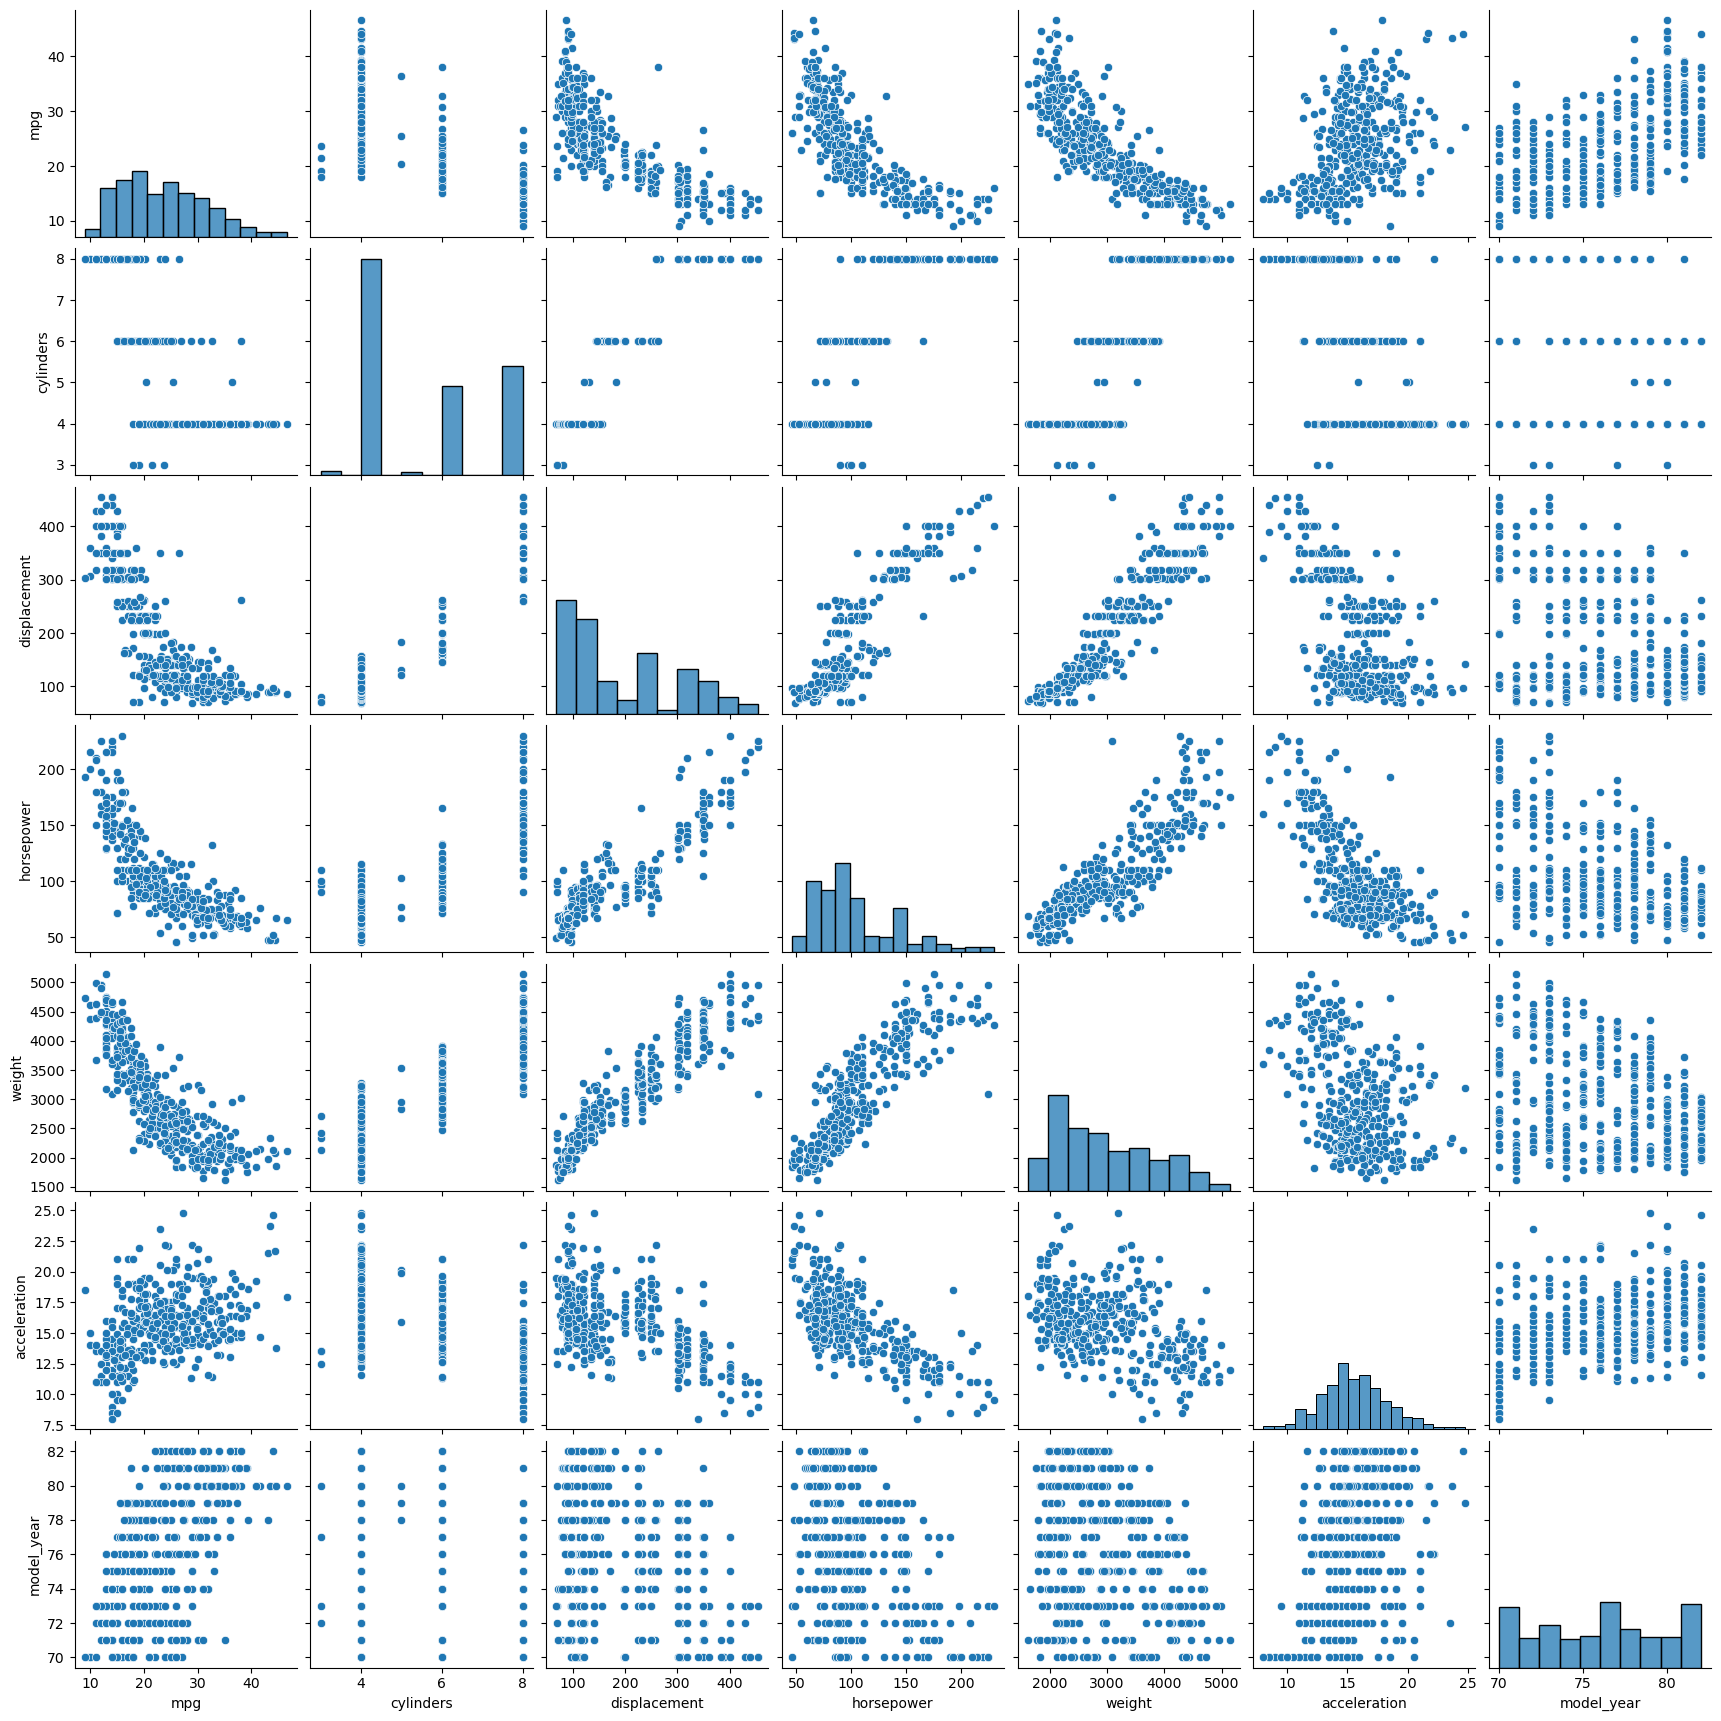

In [238]:
sns.pairplot(df)

In [239]:
##here displacement seems to be highly positvely correlated with weight and horsepower.ie. in heavy vehicles 
## the displacement and horsepower is high.
## horsepower seems to be highly correlated with weight and acceleration.

# 4.data preprocessing

In [354]:
# checking for duplicates
df.duplicated().sum()

0

In [355]:
#checking for null values in horsepower
df.loc[df.horsepower.isnull()==True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [357]:
#checking for horsepower in ford pinto
df.horsepower[df.name =='ford pinto'] 

32      NaN
112    85.0
130    80.0
168    83.0
174    97.0
206    72.0
Name: horsepower, dtype: float64

<Axes: ylabel='horsepower'>

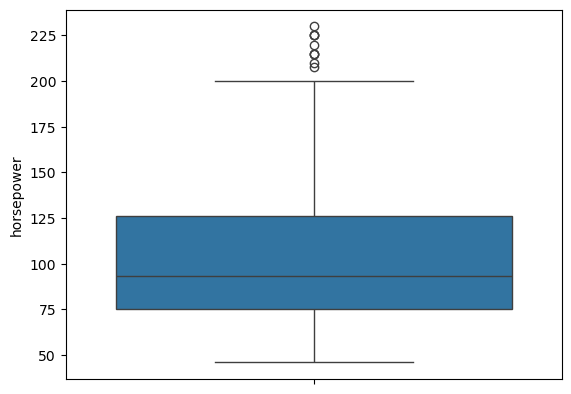

In [358]:
sns.boxplot(df.horsepower)

In [359]:
df2=df.drop('name', axis=1)

In [360]:
df2=df2.fillna(0)

In [361]:
df2.horsepower.isnull().sum()

0

In [362]:
df2.loc[df2.horsepower==0,'horsepower']=np.median(df2.horsepower) 

In [403]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [291]:

pd.set_option("display.max_rows", None)
df.name.value_counts()

name
ford pinto                              6
toyota corolla                          5
amc matador                             5
ford maverick                           5
chevrolet chevette                      4
amc gremlin                             4
chevrolet impala                        4
peugeot 504                             4
amc hornet                              4
toyota corona                           4
ford gran torino                        3
chevrolet caprice classic               3
honda civic                             3
volkswagen dasher                       3
dodge colt                              3
chevrolet citation                      3
chevrolet nova                          3
pontiac catalina                        3
plymouth fury iii                       3
ford galaxie 500                        3
chevrolet vega                          3
plymouth duster                         3
amc matador (sw)                        2
volkswagen rabbit            

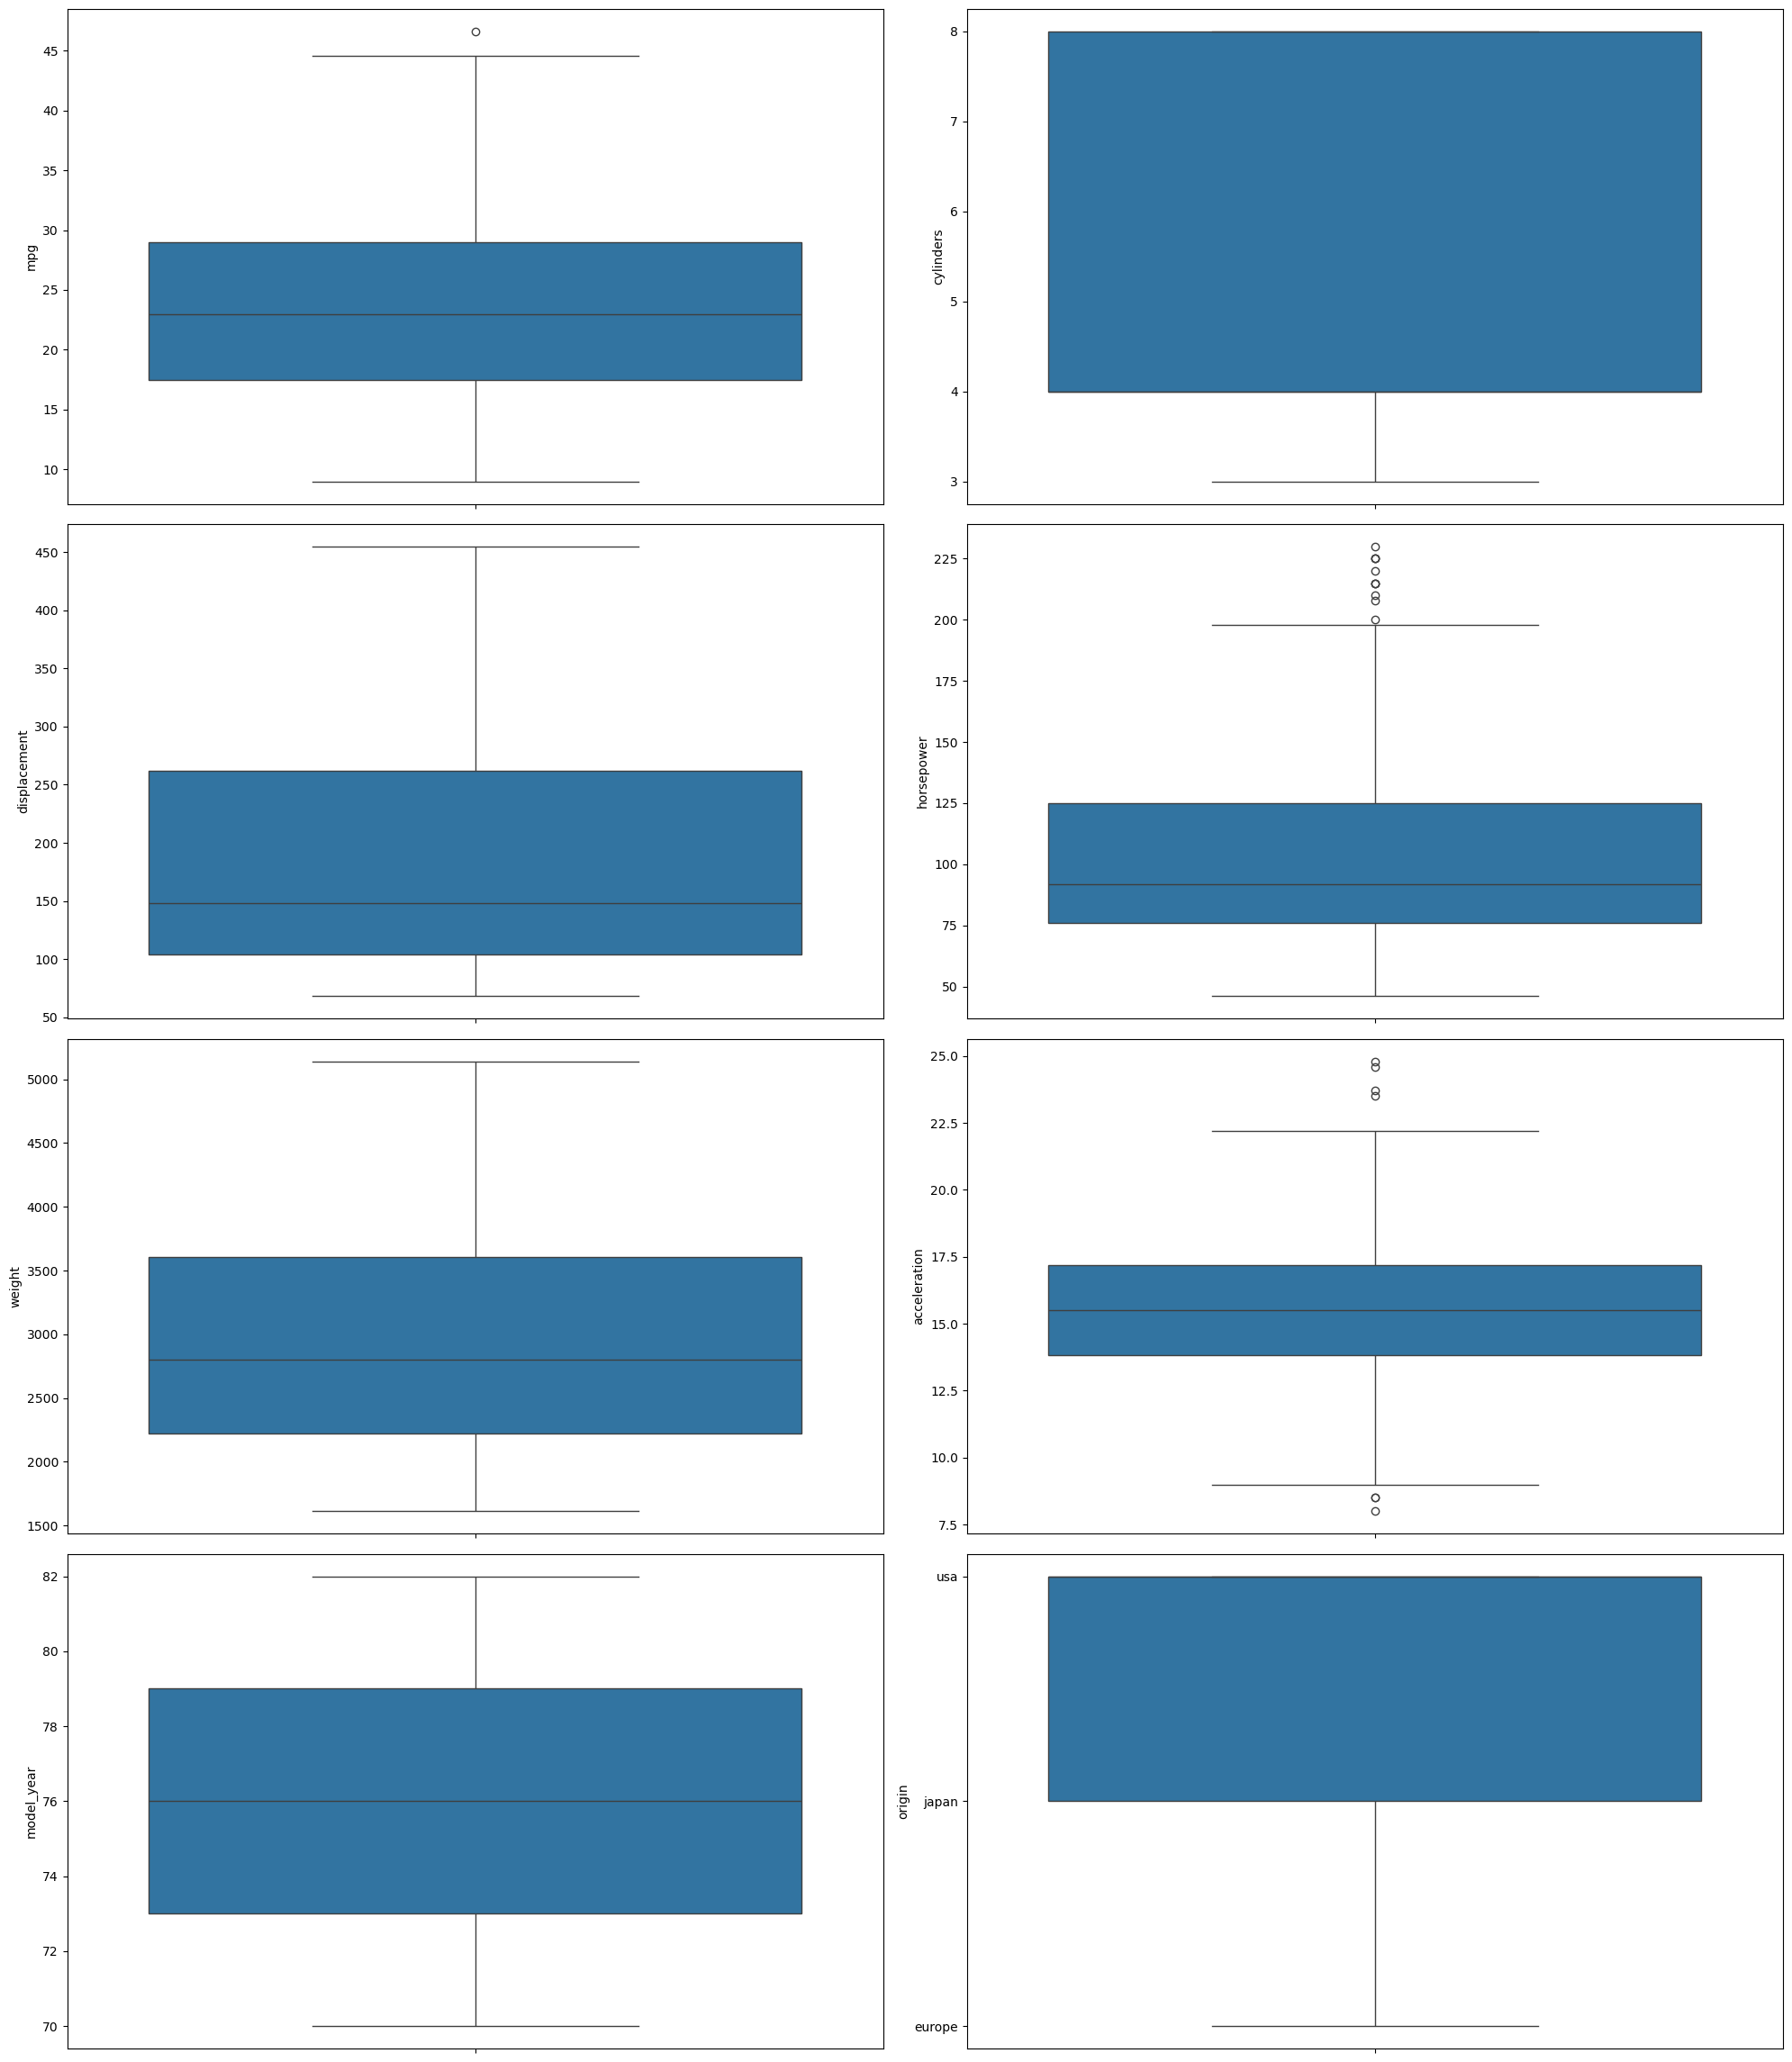

In [249]:
plt.figure(figsize=(20,23),facecolor='white')
plotno2=1
for j in df2.columns:
    plt.subplot(4,2,plotno2)
    sns.boxplot(df2[j])
    plotno2+=1
plt.tight_layout()


In [250]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.281407,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.229470,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [363]:
df2.loc[(df2.acceleration<8.75),'acceleration']=np.median(df2.acceleration)
df2.loc[(df2.acceleration>22.5),'acceleration']=np.median(df2.acceleration)

<Axes: ylabel='acceleration'>

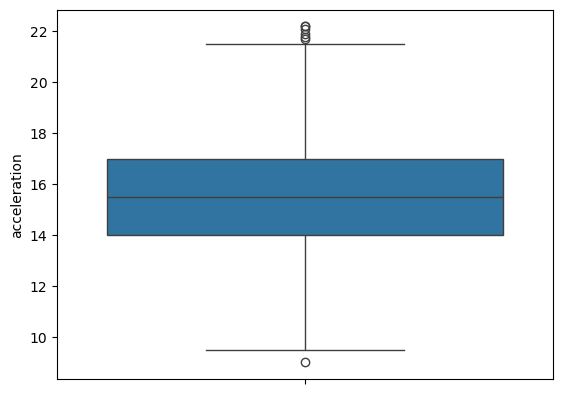

In [252]:
sns.boxplot(df2.acceleration)


In [364]:
df3= df2.drop('origin', axis=1)

# scaling

In [365]:
from sklearn.preprocessing import MinMaxScaler
obj = MinMaxScaler()
df4 = obj.fit_transform(df3)

In [366]:
df4

array([[0.2393617 , 1.        , 0.61757106, ..., 0.5361497 , 0.22727273,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.58973632, 0.18939394,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.51686986, 0.15151515,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.19336547, 0.1969697 ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.2869294 , 0.72727273,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.31386447, 0.78787879,
        1.        ]])

In [367]:
df3.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [369]:
scaled_data= pd.DataFrame(df4, columns=['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'])

In [385]:
scaled_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.227273,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.189394,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.151515,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.227273,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.113636,0.0


In [273]:
cor=scaled_data.corr( numeric_only = True)

<Axes: >

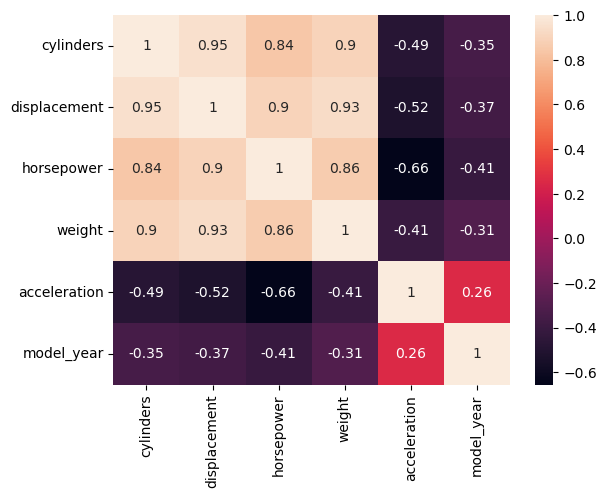

In [274]:
sns.heatmap(cor,annot=True)

## so here cylinders, displacement,horsepower and weight are highly correlated with eath other.
## lets drop displacement, horsepower and weight

In [377]:
final_df = scaled_data.drop(['displacement','horsepower','weight'], axis=1)

In [376]:
x=final_df.drop('mpg', axis=1)

In [378]:
y=final_df['mpg']

In [382]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=44)

In [384]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()

In [387]:
obj.fit(x_train, y_train)
y_pred= obj.predict(x_test)

In [396]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred.shape

(100,)

In [397]:
y_test.shape

(100,)

In [398]:
y_train.shape

(298,)

In [399]:
y_pred

array([0.58019607, 0.62021326, 0.60000826, 0.62123457, 0.56038388,
       0.54147515, 0.14990554, 0.08960478, 0.38553077, 0.22711168,
       0.61938835, 0.1291506 , 0.3071462 , 0.07140312, 0.3863164 ,
       0.5041683 , 0.07140312, 0.40467531, 0.4432391 , 0.18752658,
       0.52225218, 0.08960478, 0.32731192, 0.54139659, 0.60099029,
       0.62029182, 0.52335205, 0.30694979, 0.3267227 , 0.60071532,
       0.42240547, 0.24676675, 0.38498084, 0.16850002, 0.62037038,
       0.46352254, 0.32750833, 0.18788011, 0.54210365, 0.24684544,
       0.1291506 , 0.46301201, 0.52185937, 0.12973982, 0.32632989,
       0.22695456, 0.28678407, 0.42582306, 0.4440246 , 0.60067604,
       0.34618136, 0.42385901, 0.46320842, 0.52229146, 0.50189012,
       0.46556529, 0.16771439, 0.56038388, 0.425273  , 0.22825097,
       0.62154882, 0.56274075, 0.12856138, 0.20726021, 0.44245335,
       0.12875779, 0.5805496 , 0.40605016, 0.36666133, 0.08999759,
       0.4042825 , 0.54131803, 0.34653489, 0.44371035, 0.54324

In [389]:
mean_squared_error(y_test,y_pred)

0.01194082465547033

In [390]:
mean_absolute_error(y_test,y_pred)

0.08514665298195633

In [391]:
r2_score(y_test,y_pred)

0.726853318472326

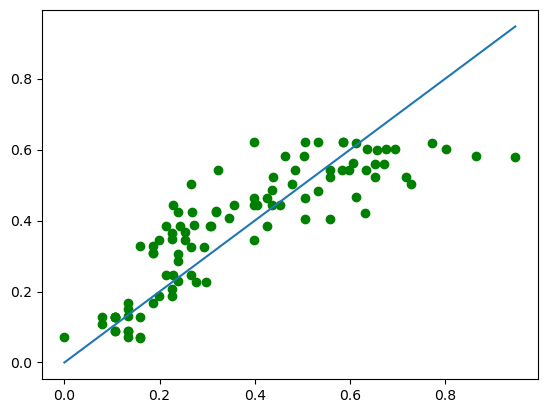

In [401]:
plt.scatter(y_test, y_pred,color='green')
p1=max(max(y_pred), max(y_test))
p2=min(min(y_pred),min(y_test))
plt.plot([p1,p2],[p1,p2])

In [404]:
## our model is able to explain 73% of changes in the dependent variable mpg